## This notebook can be used to get positions of antennas in the LWA-SV array

lsl is now python 3 compatible. To install, download distribution from https://github.com/lwa-project/lsl and <code> pip install . </code>

In [1]:
%matplotlib notebook
import numpy as np
import lsl
from lsl.common.stations import lwasv, ecef_to_geo, geo_to_ecef
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
def Rad2Deg(rad):
    return (rad)*(180/np.pi)

### Center Stake Location 

In [3]:
lwa_lat, lwa_lon, lwa_elev = lwasv.aipy_location
print('Lat(degrees)', Rad2Deg(lwa_lat), 'Lon(degrees)', Rad2Deg(lwa_lon), 'Alt(m)', lwa_elev)

Lat(degrees) 34.348358 Lon(degrees) -106.885783 Alt(m) 1477.8


### Stands and Antennas. 
Each stand has 2 antennas. Each stand's position is given relative to that of center stake. <br>
Status codes of antennas are:
 * 0 == Not installed
 * 1 == Bad
 * 2 == Suspect, possibly bad
 * 3 == OK

In [4]:
ants = lwasv.antennas
stands = lwasv.stands

In [5]:
#function to get GPS positons of a Stand 
def get_gps_pos(stand):
    c_x, c_y, c_z = geo_to_ecef(lwa_lat,lwa_lon,lwa_elev)
    x , y, z = c_x+stand.x, c_y+stand.y, c_z+stand.z
    lat, lon, alt = ecef_to_geo(x,y,z)
    return Rad2Deg(lat), Rad2Deg(lon), alt
    

In [6]:
get_gps_pos(stands[0])

(34.34844924520396, -106.8862515943477, 1467.4217711118981)

In [7]:
x_pos=[]
y_pos= []
number= []
newlist = [str(x) for x in number]
for stand in stands:
    number.append(stand.id)
    x_pos.append(stand.x)
    y_pos.append(stand.y)

In [8]:
colors = []
labels = []
for ant in ants:
    if ant.status == 3:
        colors.append("palegreen")
        labels.append("works!")
    elif ant.status == 2:
        colors.append("yellow")
        labels.append("suspiscious")
    elif ant.status == 0:
        colors.append("blue")
        labels.append("not installed")
        
    else:
        colors.append("red")
        labels.append("dead")

<IPython.core.display.Javascript object>


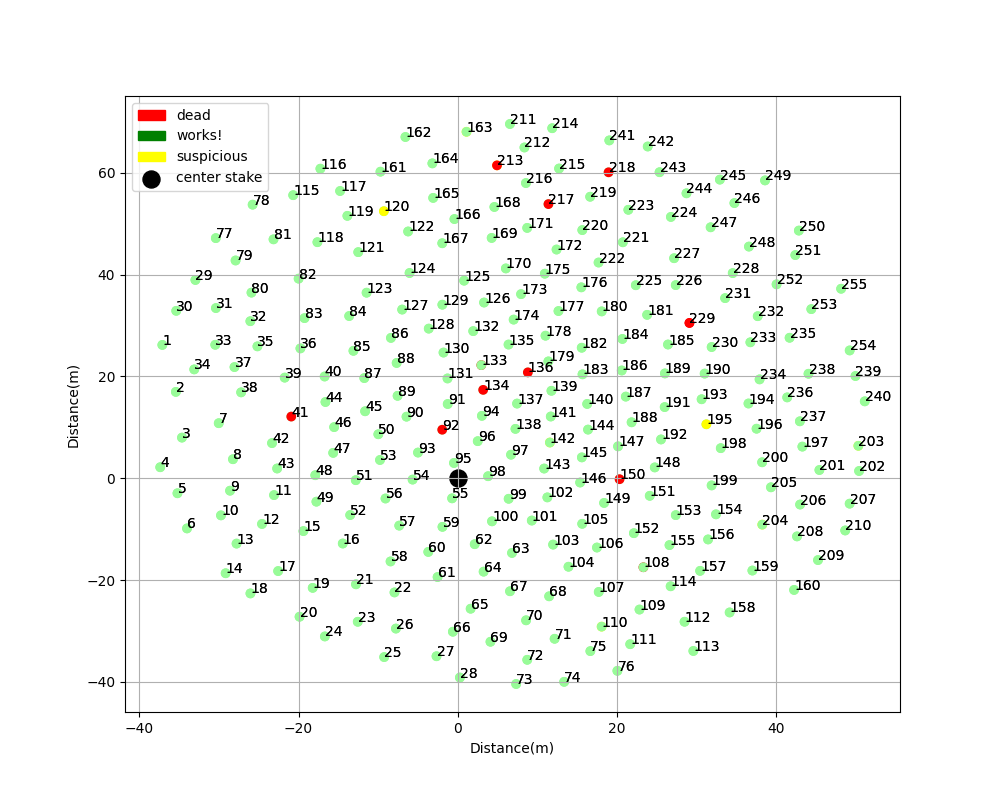

Text(0, 0.5, 'Distance(m)')

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(x_pos[:-2],y_pos[:-2], color=colors[:-2]) #excluding outrigger
#plt.scatter(x_pos[4],y_pos, color=colors) #includes outrigger
ref = plt.scatter(0,0, color = 'k', s = 150, label = 'center stake')
for i, txt in enumerate(number):
    plt.annotate(txt, (x_pos[i], y_pos[i]))
    
#antenna status labels
red = mpatches.Patch(color = 'red', label='dead')
green = mpatches.Patch(color = 'green', label='works!')
yellow = mpatches.Patch(color = 'yellow', label='suspicious')
plt.legend(handles=[red,green,yellow,ref])
plt.grid()
plt.xlabel('Distance(m)')
plt.ylabel('Distance(m)')